# Importing Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Data Collection and Preprocessing

In [84]:
#loading the data from csv file to a pandas dataframe
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [85]:
#head() - returns the first 5 records of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [86]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Combining the two dataframes

In [87]:
data = pd.concat([exercise, calories["Calories"]], axis = 1)

In [88]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [89]:
#checking number of rows and columns
data.shape

(15000, 9)

In [90]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [91]:
#describing the dataset
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [92]:
#checking missing values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Visualization


In [93]:
columns = data.columns


<AxesSubplot:xlabel='Gender', ylabel='count'>

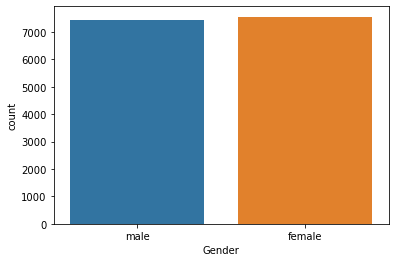

In [94]:
sns.countplot(data["Gender"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

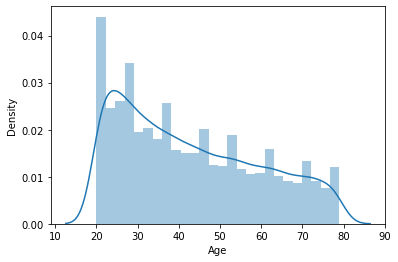

In [95]:
sns.distplot(data["Age"])

<AxesSubplot:xlabel='Height', ylabel='Density'>

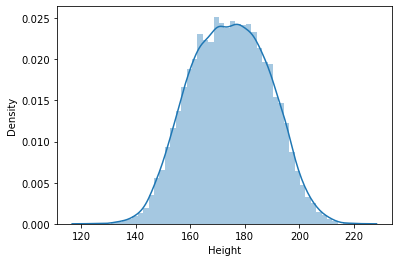

In [96]:
sns.distplot(data["Height"])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

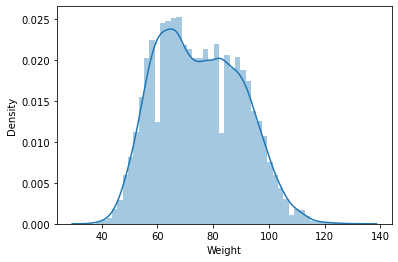

In [97]:
sns.distplot(data["Weight"])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

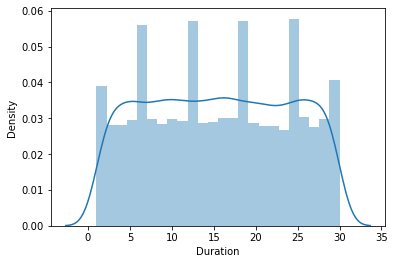

In [98]:
sns.distplot(data["Duration"])

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

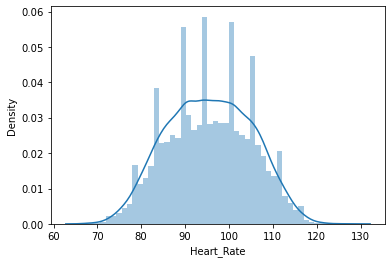

In [99]:
sns.distplot(data["Heart_Rate"])

<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

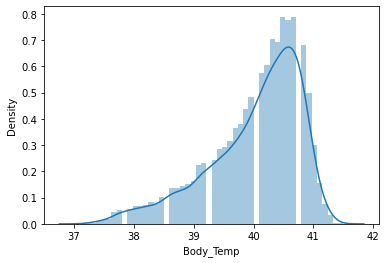

In [100]:
sns.distplot(data["Body_Temp"])

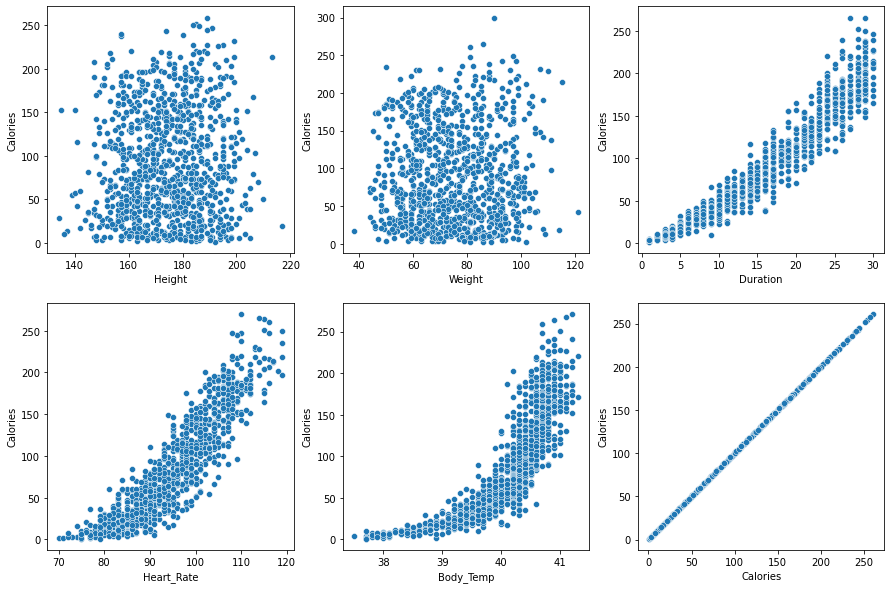

In [101]:
features = data.select_dtypes(include = "float").columns
plt.subplots(figsize = (15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    x = data.sample(1000)
    sns.scatterplot(x[col], x["Calories"])

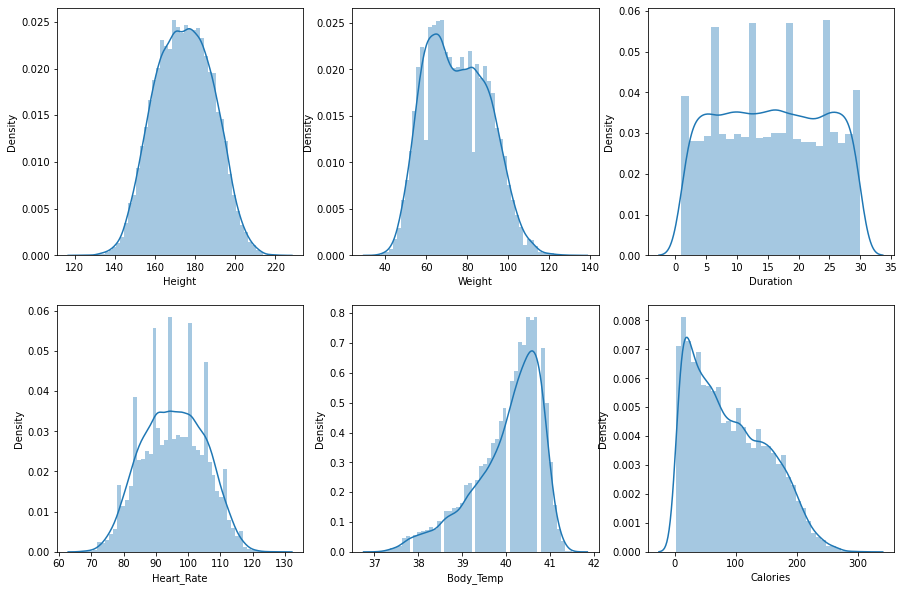

In [102]:
features = data.select_dtypes(include = "float").columns
plt.subplots(figsize = (15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.distplot(data[col])

# Converting categorical data into numerical data(Gender)

In [103]:
data.replace({"male" : 0, "female" : 1}, inplace = True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [104]:
corr = data.corr()

<AxesSubplot:>

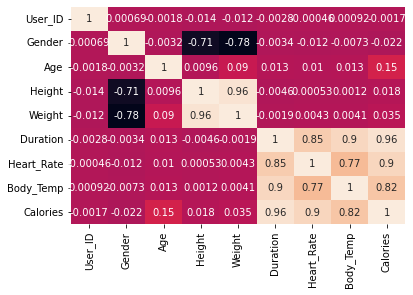

In [105]:
sns.heatmap(corr, annot = True, cbar = False)

# Separating independent and dependent  features

In [106]:
x = data.drop(["User_ID", "Calories"], axis = 1)
y = data["Calories"].values

In [107]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [108]:
y

array([231.,  66.,  26., ...,  75.,  11.,  98.])

# Splitting the data into training and testing datasets

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [132]:
x_train.shape, x_test.shape

((10500, 7), (4500, 7))

In [133]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [134]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(x_test)
testing_error = mae(y_test, y_pred)
print("Mean Absolute Error:", testing_error)

Mean Absolute Error: 8.451945920538378


In [136]:
score = r2_score(y_test, y_pred)
print("Accuracy:", score * 100)

Accuracy: 96.6327512761902


In [137]:
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [138]:
y_pred = xg.predict(x_test)
testing_error = mae(y_test, y_pred)
print("Mean Absolute Error", testing_error)

Mean Absolute Error 1.5456061256561013


In [139]:
score = r2_score(y_test, y_pred)
print("Accuracy:",score * 100)

Accuracy: 99.87202797999416
